# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
request_btc = requests.get(btc_url).json()
request_btc_price = request_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
request_eth = requests.get(eth_url).json()
request_eth_price = request_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
my_btc_value = request_btc_price * my_btc
my_eth_value = request_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15767.42
The current value of your 5.3 ETH is $2184.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
key = os.getenv('APCA_API_KEY_ID')
secret = os.getenv('APCA_API_SECRET_KEY')
print(type(key))

# Create the Alpaca API object
alpaca = tradeapi.REST(key, secret, api_version = 'v2')


<class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df = alpaca.get_barset(tickers, timeframe, start=today, end=today).df

# Preview DataFrame
df.head()

AGG                                     SPY  \
                            open    high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3482671  345.93   

                                                             
                             high     low   close    volume  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df['AGG']['close'])
spy_close_price = float(df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_assets_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value
columns = {'amount': [total_assets_value, total_shares_value]}

rows = ['crypto', 'shares']

df_savings = pd.DataFrame(index=rows, data=columns)

# Display savings DataFrame
display(df_savings)

,amount
crypto,17951.872
shares,40782.000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027399D57F88>],
      dtype=object)

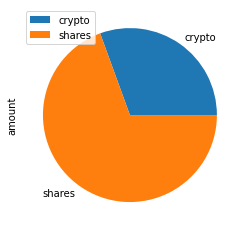

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie',subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_assets_value + total_shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having enough money in your emergency fund!")
elif total_savings == emergency_fund:
    print("Congratulations on reaching the emergency fund goal!")
else:
    print(f"You are ${emergency_fund - total_savings} from your emergency fund goal")

Congratulations on having enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-23', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = ['SPY','AGG']
df_stock_data = alpaca.get_barset(
    df_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0  206.97   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0  208.34   

                                                              
                             high     low   close     volume  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  209.27  208.21  208.87   64052955

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
mc_30y.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002399,1.005763,1.003300,0.998613,0.996319,0.998663,1.008254,1.000680,1.014318,0.998077,...,0.988619,0.998717,1.004370,0.992165,1.004917,1.004962,0.994115,1.005045,1.004010,0.997795
2,0.994330,0.997322,0.993686,0.998063,1.005183,1.003670,1.003848,1.006855,1.021731,1.001165,...,0.984175,1.003041,1.008993,0.998410,1.009619,1.002656,0.992522,1.001953,1.011417,1.000334
3,0.989457,1.003852,0.989124,1.005076,1.011894,1.006411,0.992991,1.011243,1.027632,1.002094,...,0.978101,1.000032,1.014591,0.996964,1.006081,0.991164,0.998922,1.000123,1.005920,0.996407
4,0.992106,1.005980,0.991883,1.001379,1.011836,1.004867,1.002077,1.011027,1.029669,1.001980,...,0.974193,0.997987,1.001981,0.995546,1.011492,0.992049,1.003600,1.003106,0.999484,0.995099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.016571,4.570847,2.777109,4.264002,10.143085,6.025000,6.350190,3.906771,10.256681,3.750738,...,3.267265,8.908906,4.399665,3.605429,3.821588,2.465763,3.639084,5.880400,4.788081,5.939390
7557,9.063046,4.524754,2.753010,4.266230,10.161401,5.994373,6.390061,3.890723,10.293731,3.771324,...,3.259253,8.904129,4.423723,3.586012,3.846133,2.451337,3.627708,5.871014,4.773715,5.917251
7558,9.056236,4.528536,2.761847,4.249888,10.134088,5.960527,6.387713,3.868118,10.238926,3.765265,...,3.230406,8.912843,4.409697,3.602958,3.838096,2.439990,3.648685,5.815683,4.763139,5.910432
7559,9.041686,4.506372,2.735279,4.286087,10.188584,5.939576,6.340029,3.894341,10.306055,3.760545,...,3.247082,8.990257,4.380897,3.603501,3.827840,2.458922,3.653309,5.812274,4.738275,5.954440


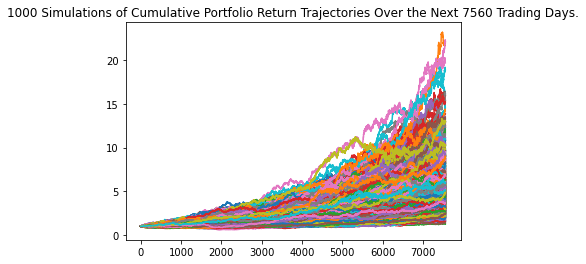

In [19]:
# Plot simulation outcomes
line_plot = mc_30y.plot_simulation()

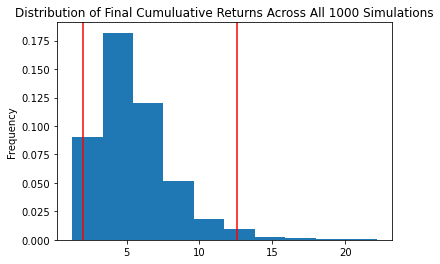

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = mc_30y.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = mc_30y.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           1000.000000
mean               5.571358
std                2.703807
min                1.265911
25%                3.703176
50%                5.016031
75%                6.834335
max               22.152545
95% CI Lower       2.023334
95% CI Upper      12.551605
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8] * initial_investment, 2)
ci_upper = round(summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $40466.68 and $251032.1


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8] * initial_investment, 2)
ci_upper = round(summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $60700.02 and $376548.15


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.70, .30],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992408,1.000434,0.999776,1.002490,1.002559,1.003821,1.002556,0.996793,0.999276,1.003209,...,1.003996,0.999863,0.999988,0.997034,0.997458,0.997925,1.001381,0.988171,1.000149,1.000846
2,0.996568,0.998519,0.997358,1.000004,0.993858,1.005718,1.003527,0.993398,1.004189,1.001990,...,1.004094,0.998883,0.998216,0.991464,1.004952,1.007398,1.003958,0.988351,1.000829,1.009178
3,1.001670,1.002299,1.000658,1.000320,0.989464,1.007584,1.001030,0.988119,1.005508,1.002134,...,1.000541,1.000938,1.000900,0.999866,1.008219,1.009746,1.004303,0.987820,0.998647,1.011033
4,1.003993,1.004453,1.004854,0.998745,0.986187,1.009991,1.001338,0.987608,1.006348,1.006020,...,0.999005,1.003950,1.006576,1.003570,1.011665,1.008413,1.002400,0.994292,0.995604,1.014296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.347542,1.139227,1.018203,1.167747,1.269152,1.443664,0.961983,1.384071,1.266942,1.010888,...,1.219064,1.441539,1.137736,1.432157,1.467162,1.194352,0.974861,1.063987,1.364525,1.110567
1257,1.349676,1.145965,1.017979,1.166339,1.266693,1.445160,0.963083,1.384589,1.270104,1.013269,...,1.226121,1.443954,1.145549,1.431916,1.473882,1.198789,0.971376,1.066796,1.369808,1.107054
1258,1.345136,1.144884,1.016998,1.165277,1.277620,1.444678,0.968605,1.377860,1.272039,1.015372,...,1.216326,1.438453,1.137337,1.425337,1.471112,1.195421,0.977311,1.072853,1.375835,1.104002
1259,1.341249,1.146872,1.023223,1.164642,1.277190,1.453536,0.971380,1.383431,1.282956,1.009117,...,1.202378,1.436817,1.131007,1.431907,1.468034,1.188751,0.969041,1.069068,1.368803,1.110413


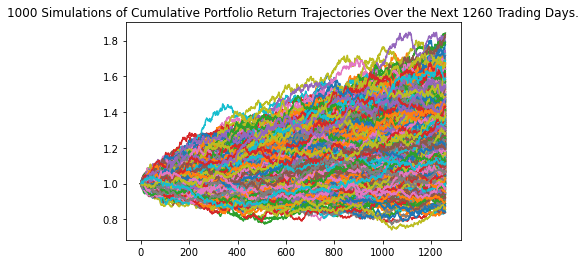

In [26]:
# Plot simulation outcomes
line_plot_5y = mc_5y.plot_simulation()

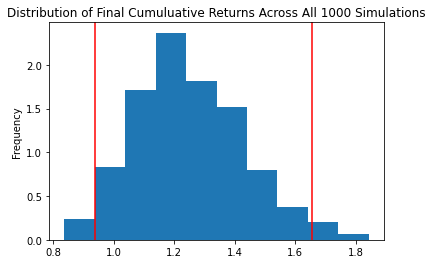

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_5y = mc_5y.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5y = mc_5y.summarize_cumulative_return()

# Print summary statistics
print(summary_5y)

count           1000.000000
mean               1.250668
std                0.180184
min                0.837146
25%                1.124845
50%                1.227955
75%                1.366913
max                1.842207
95% CI Lower       0.939529
95% CI Upper       1.654524
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary[8] * initial_investment, 2)
ci_upper_five = round(summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $40466.68 and $251032.1


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80, .20],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001574,1.000351,1.004553,1.003090,1.004431,1.001814,1.005374,1.000596,1.000058,1.004641,...,0.996231,1.000938,0.999094,0.995756,1.001767,0.999552,0.998158,0.997042,1.001837,1.000921
2,1.002709,0.997690,1.008805,1.004048,1.008150,1.001358,1.003424,1.001229,0.996790,1.007503,...,0.997313,0.998336,1.003454,0.995297,1.004097,1.002076,1.002965,0.993854,1.006926,0.998720
3,1.000218,1.001908,1.011720,1.001838,1.007750,0.998768,1.006156,1.001199,0.995626,1.003197,...,0.998504,1.001840,1.008333,0.990370,1.003057,1.000276,0.998014,0.995652,1.002280,1.003416
4,1.004089,0.999244,1.007182,1.004472,1.007245,0.997564,1.011655,1.005307,0.996076,1.003054,...,0.997847,1.002657,1.006331,0.990089,1.002096,1.000460,0.997619,0.995586,1.003836,0.999985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.443943,1.526275,1.232914,1.494295,1.419749,1.447870,1.972473,1.481921,1.341093,1.245899,...,1.397135,1.322887,1.399117,1.447606,1.143130,1.319676,1.658925,1.424846,1.317389,1.572907
2517,1.452595,1.521700,1.232393,1.499003,1.416484,1.446716,1.957618,1.484862,1.336231,1.243795,...,1.389863,1.321526,1.400737,1.439864,1.138127,1.313182,1.660383,1.426376,1.325352,1.571696
2518,1.450428,1.518498,1.223074,1.498944,1.415054,1.442381,1.963085,1.499332,1.325769,1.241889,...,1.382203,1.326251,1.404872,1.436477,1.134953,1.311161,1.659489,1.420036,1.320810,1.580968
2519,1.446340,1.522225,1.220610,1.500623,1.403346,1.446660,1.955848,1.503421,1.328915,1.247495,...,1.389179,1.325697,1.408259,1.441431,1.127686,1.308698,1.651230,1.419305,1.318288,1.586847


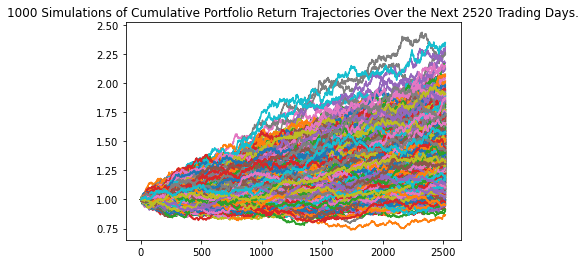

In [32]:
# Plot simulation outcomes
line_plot_10y = mc_10y.plot_simulation()

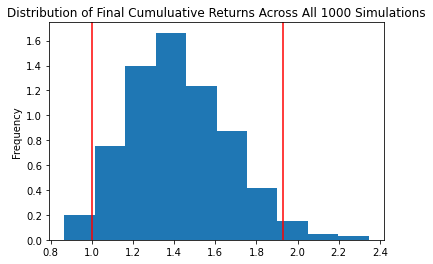

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_10y = mc_10y.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10y = mc_10y.summarize_cumulative_return()

# Print summary statistics
print(summary_10y)

count           1000.000000
mean               1.421522
std                0.244380
min                0.866898
25%                1.249236
50%                1.399131
75%                1.577636
max                2.345544
95% CI Lower       1.000970
95% CI Upper       1.929280
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary[8] * initial_investment, 2)
ci_upper_ten = round(summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $60700.02 and $376548.15
